<a href="https://colab.research.google.com/github/Chi68P1/AI/blob/main/Predict_faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils.image_utils import img_to_array
from keras.utils import load_img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

folder='/content/drive/MyDrive/Colab Notebooks/Faces/'

In [ ]:
photos,labels = list(),list()

In [ ]:
for file in listdir(folder):
  output=0.0
  if file.startswith('phi'):
    output=1.0
  if file.startswith('hung'):
    output=2.0
  if file.startswith('nam'):
    output=3.0
  if file.startswith('hieu'):
    output=4.0
  if file.startswith('chuong'):
    output=5.0
  if file.startswith('chi'):
    output=6.0
  if file.startswith('truong'):
    output=7.0
  if file.startswith('phong'):
    output=8.0
  if file.startswith('tri'):
    output=9.0
  if file.startswith('thang'):
    output=10.0
  if file.startswith('dong'):
    output=11.0
  if file.startswith('thanh'):
    output=12.0
  if file.startswith('binh'):
    output=13.0
  photo = load_img(folder+file,target_size=(100,100))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

In [ ]:
photos = asarray(photos)
labels = asarray(labels)
save('/content/drive/MyDrive/Colab Notebooks/photo_faces.npy',photos)
save('/content/drive/MyDrive/Colab Notebooks/label_faces.npy',labels)

In [ ]:
photos.shape

(690, 100, 100, 3)

In [ ]:
labels.shape

(690,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, test_x, train_y,  test_y = train_test_split(photos,labels, test_size=0.3, train_size=0.7)
     

In [ ]:
train_x.shape

(482, 100, 100, 3)

In [ ]:
test_x.shape

(207, 100, 100, 3)

In [ ]:
train_x = train_x.astype('float32')
train_x = train_x/255

In [ ]:
test_x = test_x.astype('float32')
test_x = test_x/255

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(train_y)
y_test = to_categorical(test_y)

In [ ]:
train_x.shape

(482, 100, 100, 3)

In [ ]:
y_train.shape

(482, 14)

In [ ]:
from keras import Sequential,Model,Input
from keras.layers import Dense,Flatten,Dropout, Conv2D, MaxPooling2D,Normalization
from keras.optimizers import Adam

In [ ]:
batch_size = 100
epochs = 10
classes = 14

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(100,100,3),padding='same'))

In [ ]:
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(700,activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(classes,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 100, 100, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50, 50, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                    

In [ ]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics =['accuracy'])

In [ ]:
train = model.fit(train_x,y_train,batch_size=64,epochs=15,verbose=1)
test_loss, test_acc = model.evaluate(test_x, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

Epoch 1/15
8/8 [==============================] - 11s 72ms/step - loss: 4.0883 - accuracy: 0.1701
Epoch 2/15
8/8 [==============================] - 0s 28ms/step - loss: 1.5534 - accuracy: 0.6722
Epoch 3/15
8/8 [==============================] - 0s 31ms/step - loss: 0.3181 - accuracy: 0.9398
Epoch 4/15
8/8 [==============================] - 0s 28ms/step - loss: 0.1002 - accuracy: 0.9710
Epoch 5/15
8/8 [==============================] - 0s 31ms/step - loss: 0.0458 - accuracy: 0.9855
Epoch 6/15
8/8 [==============================] - 0s 29ms/step - loss: 0.0260 - accuracy: 0.9938
Epoch 7/15
8/8 [==============================] - 0s 30ms/step - loss: 0.0146 - accuracy: 0.9979
Epoch 8/15
8/8 [==============================] - 0s 29ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 9/15
8/8 [==============================] - 0s 30ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 10/15
8/8 [==============================] - 0s 32ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 11/15
8/8 [===========

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Predict_faces.h5')

1/1 [==============================] - 0s 204ms/step
[13]
Đây là bình


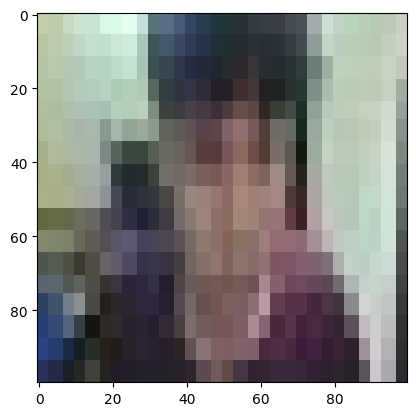

In [ ]:
#test mo hinh
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
img = load_img('test.jpg',target_size=(100,100,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,100,100,3)
img = img.astype('float32')
img = img/255
a = np.argmax(model.predict(img),axis=-1)
print(a)
if(a == 1):
  print("Đây là phi")
if (a == 2):
  print("Đây là hùng")
if (a == 3):
  print("Đây là nam")
if (a == 4):
  print("Đây là hiếu")
if (a == 5):
  print("Đây là chương")
if (a == 6):
  print("Đây là chí")
if (a == 7):
  print("Đây là trường")
if (a == 8):
  print("Đây là phong")
if (a == 9):
  print("Đây là trí")
if (a == 10):
  print("Đây là thắng")
if (a == 11):
  print("Đây là đông")
if (a == 12):
  print("Đây là thanh")
if (a == 13):
  print("Đây là bình")